<h1>A brief overview of survival data of RMS Titanic</h1>
We will study briefly the data from Titanic, with analysing the survival ratio with various variables

The dataset is from the Titanic dataset, containing information about passengers. The columns include:

1. PassengerId: A unique identifier for each passenger.
2. Survived: Whether the passenger survived (1) or not (0).
3. Pclass: The passenger class (1st, 2nd, 3rd).
4. Name: The name of the passenger.
5. Sex: The gender of the passenger.
6. Age: The age of the passenger.
7. SibSp: The number of siblings/spouses aboard.
8. Parch: The number of parents/children aboard.
9. Ticket: The ticket number.
10. Fare: The fare paid for the ticket.
11. Cabin: The cabin number (if known).
12. Embarked: The port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

First, to load database, we load pandas library into python

In [78]:
import pandas as pd

The we load database into dataframe

In [79]:
df = pd.read_excel("train.xlsx")


Lets now look for the missing values in the given data set:

In [80]:
missing_values = df.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

We can see that <b>'Cabin'</b> has many null values, so we will remove it  from the dataset.

In [81]:
df_cleaned = df.drop(columns=['Cabin'])

Similarly <b>'Embarked'</b> has 2 null entries. So we will replace it with the most common value.

In [ ]:
most_frequent_embarked = df_cleaned['Embarked'].mode()[0]
df_cleaned['Embarked'].fillna(most_frequent_embarked, inplace=True)


Lets confirm the <b>NaN</b> values in the data set

In [83]:
missing_values = df_cleaned.isnull().sum()
missing_values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now we'll analyse the data using matplotlib and seaborn

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

Now lets create subplots for <b>Pclass, Sex</b> and <b>Embarked</b>.

Text(0.5, 1.0, 'Distribution of Passenger Class')

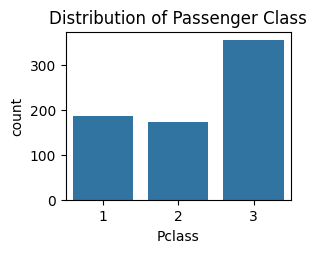

In [85]:
plt.subplot(2, 2, 1)
sns.countplot(x='Pclass', data=df_cleaned)
plt.title('Distribution of Passenger Class')

Text(0.5, 1.0, 'Distribution of Gender')

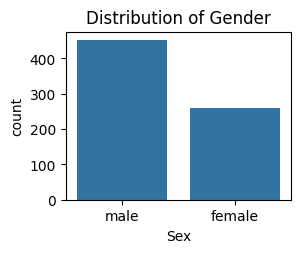

In [86]:
plt.subplot(2, 2, 2)
sns.countplot(x='Sex', data=df_cleaned)
plt.title('Distribution of Gender')

Text(0.5, 1.0, 'Distribution of Embarkation Ports')

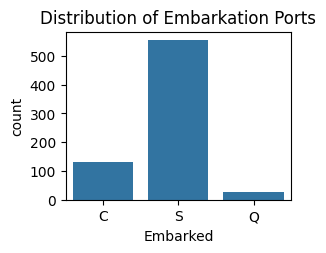

In [87]:
plt.subplot(2, 2, 3)
sns.countplot(x='Embarked', data=df_cleaned)
plt.title('Distribution of Embarkation Ports')

Text(0.5, 1.0, 'Distribution of Age')

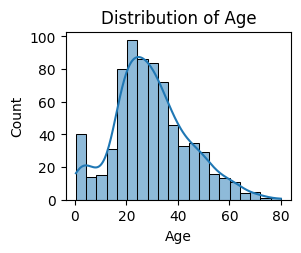

In [88]:
plt.subplot(2, 2, 4)
sns.histplot(df_cleaned['Age'],kde=True)
plt.title('Distribution of Age')

Now we will calculate the survival rate of passengers according to each of the grouping we did.

1. Pclass

In [89]:
survival_by_pclass = df_cleaned.groupby('Pclass')['Survived'].mean()
print(survival_by_pclass)

Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64


2. Sex

In [90]:
survival_by_sex = df_cleaned.groupby('Sex')['Survived'].mean()
print(survival_by_sex)

Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64


3. Embarked

In [91]:
survival_by_embarked = df_cleaned.groupby('Embarked')['Survived'].mean()
print(survival_by_embarked)

Embarked
C    0.607692
Q    0.285714
S    0.365108
Name: Survived, dtype: float64


Lets plot this data on a graph

In [92]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

1. Survival by PClass

Text(0.5, 1.0, 'Survival Rate by Pclass')

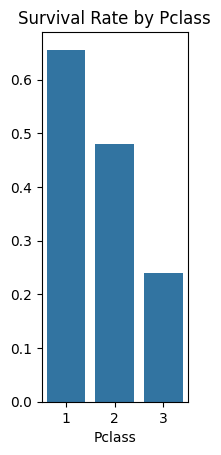

In [93]:
plt.subplot(1, 3, 1)
sns.barplot(x=survival_by_pclass.index, y=survival_by_pclass.values)
plt.title('Survival Rate by Pclass')

2. Survival by Sex

Text(0.5, 1.0, 'Survival Rate by Sex')

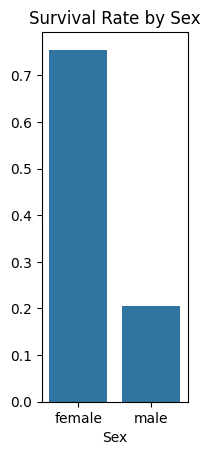

In [94]:
plt.subplot(1, 3, 2)
sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values)
plt.title('Survival Rate by Sex')

3. Survival by Embarked

Text(0.5, 1.0, 'Survival Rate by Embarked')

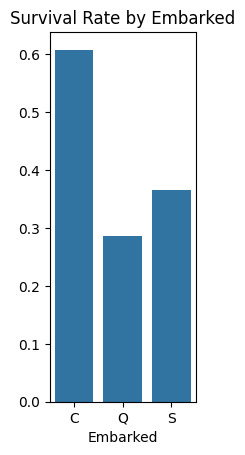

In [95]:
plt.subplot(1, 3, 3)
sns.barplot(x=survival_by_embarked.index, y=survival_by_embarked.values)
plt.title('Survival Rate by Embarked')

<h3>At the end, lets plot a correlation between these variables with each other.</h3>

First, we will create a correlation matrix.

In [96]:
df_cleaned['Sex'] = df_cleaned['Sex'].map({'male': 0, 'female': 1})
df_cleaned['Embarked'] = df_cleaned['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_numeric = df_cleaned.drop(columns=['PassengerId', 'Name', 'Ticket'])
correlation_matrix = df_numeric.corr()


Now, we will plot it:

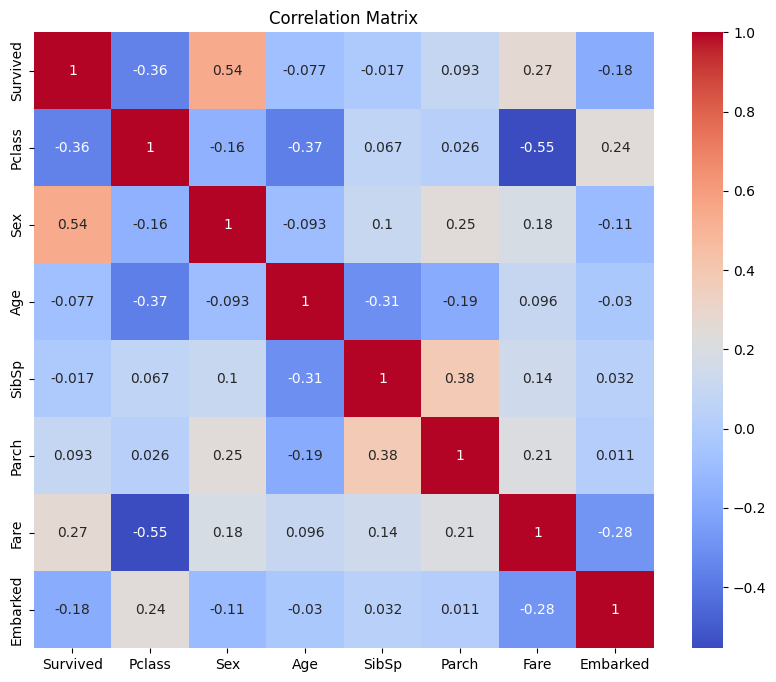

In [97]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()